In [1]:
import skimage as skimage
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

pixel_size = 3.25


This is analysis for the Lawlor, Vanslambrouck, Higgins bioprinter paper.

This analysis is for images obtained from organoids used for scRNA analysis.

This notebook segments the mafb images at D7_12 and outputs various measurements for further analysis.

This first section was to generate images to illastik based annotation/segmentation. this was all images taken prior to scRNA dissocation, excluding one that had stitched incorrectly. This data is all stored in the ./trimmed folder 

In [2]:
def get_time_stamp(file_name, split_by = "_"):
    stamps = [s for s in file_name.split(split_by) if re.match("^[0-2][0-9].[0-5][0-9].[0-5][0-9]$", s)]
    assert (len(stamps) == 1), "unique time stamp not found"
    return(stamps[0])

def get_measurements(i):
    height = round(i.shape[0] / 1024)
    
    if(len(skimage.measure.regionprops(i)) < 1):
        return(0, 0, 0, 0, height)
    else:
        props = skimage.measure.regionprops(i)[0]
    
        return(props.area, props.solidity, props.major_axis_length, props.convex_area, height)



Using images that have been organised into subfolder by plate and well

eg
final
-plate1a
--w1
--w2
--w3
--etc

Initially these need to be loaded, have conditions appended and trimmed for easy display. This whole set will then get processed in illastik to generate pixel probability maps.

In [3]:
file_path = "data"


In [11]:
raw_files = glob.glob(os.path.join(file_path, "plate*","*","*.tif"))
print(len(raw_files), "files initially")

files = []
#remove duplicates
for f in raw_files:
    if 'duplicate' not in f:
        files.append(f)
    
print(len(files), "files after removing duplicates")




270 files initially
230 files after removing duplicates


Now duplicating all the data with condition strings appended to the file name, and image trimmed so sizes match for each condition. this data will be run through ilastik.

this first chunk is for the mafb-tagBFP channel.

In [12]:
for i,f in enumerate(files):
    plate = [s for s in os.path.dirname(f).split("\\") if re.match("^plate*", s)][0]
    well = os.path.dirname(f).split("\\")[2]
    img = skimage.io.imread(f)[:,:,0]
    print(img.shape)
    if img.shape[0] > 2000:
        img = img[0:4800,0:1020]
        condition = "line"
    elif 'hand' in well:
        condition = 'hand'
    else:
        condition = 'dots'
    file_string = "_".join([plate, well, condition, os.path.basename(f)])
    print(file_string)
    out_path = os.path.join('final_KE012_data','full_set_trimmed', 'bfp_' + file_string)
    print(img.shape)
    print(out_path)
    skimage.io.imsave(arr=img, fname=out_path)
    

(4992, 1028)
plate2b_w1_line_2020-02-11_17.23.54_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w1_line_2020-02-11_17.23.54_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w1_line_2020-02-11_17.23.54_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate2b_w1_line_2020-02-11_17.23.28_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w1_line_2020-02-11_17.23.28_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2b_w1_dots_2020-02-11_17.23.15_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w1_dots_2020-02-11_17.23.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w1_line_2020-02-11_17.23.28_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w1_dots_2020-02-11_17.23.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2b_w1_dots_2020-02-11_17.23.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w1_dots_2020-02-11_17.23.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate2b_w1_dots_2020-02-11_17.22.37_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w1_dots_2020-02-11_17.22.37_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w1_dots_2020-02-11_17.23.04_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w1_dots_2020-02-11_17.22.37_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate2b_w1_line_2020-02-11_17.24.19_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w1_line_2020-02-11_17.24.19_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w1_line_2020-02-11_17.24.19_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
plate2b_w4_line_2020-02-11_09.48.27_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w4_line_2020-02-11_09.48.27_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w4_line_2020-02-11_09.48.27_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2b_w4_dots_2020-02-11_09.48.01_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w4_dots_2020-02-11_09.48.01_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
plate2b_w3_dots_2020-02-11_17.28.39_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w3_dots_2020-02-11_17.28.39_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w4_dots_2020-02-11_09.48.01_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w3_dots_2020-02-11_17.28.39_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
plate2b_w3_line_2020-02-11_17.29.18_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w3_line_2020-02-11_17.29.18_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w3_line_2020-02-11_17.29.18_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate2b_w3_line_2020-02-11_17.29.45_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w3_line_2020-02-11_17.29.45_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2b_w3_dots_2020-02-11_17.28.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w3_dots_2020-02-11_17.28.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w3_line_2020-02-11_17.29.45_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w3_dots_2020-02-11_17.28.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate2b_w3_line_2020-02-11_17.30.19_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w3_line_2020-02-11_17.30.19_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2b_w3_dots_2020-02-11_17.28.25_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w3_dots_2020-02-11_17.28.25_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w3_line_2020-02-11_17.30.19_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w3_dots_2020-02-11_17.28.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate2b_w6_line_2020-02-11_09.51.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w6_line_2020-02-11_09.51.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
plate2b_w6_dots_2020-02-11_09.51.17_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w6_dots_2020-02-11_09.51.17_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w6_line_2020-02-11_09.51.40_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w6_dots_2020-02-11_09.51.17_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1031)
plate2b_w2_line_2020-02-11_17.27.41_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w2_line_2020-02-11_17.27.41_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2b_w2_dots_2020-02-11_17.26.15_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w2_dots_2020-02-11_17.26.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w2_line_2020-02-11_17.27.41_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w2_dots_2020-02-11_17.26.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2b_w2_dots_2020-02-11_17.26.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w2_dots_2020-02-11_17.26.26_iso_Kynan Lawlor_convert.tif
(4992, 1030)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w2_dots_2020-02-11_17.26.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



plate2b_w2_line_2020-02-11_17.26.42_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w2_line_2020-02-11_17.26.42_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w2_line_2020-02-11_17.26.42_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate2b_w2_line_2020-02-11_17.27.12_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w2_line_2020-02-11_17.27.12_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2b_w2_dots_2020-02-11_17.26.02_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w2_dots_2020-02-11_17.26.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w2_line_2020-02-11_17.27.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w2_dots_2020-02-11_17.26.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2b_w5_dots_2020-02-11_09.49.58_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2b_w5_dots_2020-02-11_09.49.58_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w5_dots_2020-02-11_09.49.58_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4870, 1030)
plate2b_w5_line_2020-02-11_09.50.28_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2b_w5_line_2020-02-11_09.50.28_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2b_w5_line_2020-02-11_09.50.28_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
plate3a_w4_line_2020-02-11_17.51.38_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w4_line_2020-02-11_17.51.38_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w4_dots_2020-02-11_17.49.29_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w4_dots_2020-02-11_17.49.29_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w4_line_2020-02-11_17.51.38_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w4_dots_2020-02-11_17.49.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3a_w4_dots_2020-02-11_17.49.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w4_dots_2020-02-11_17.49.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate3a_w4_dots_2020-02-11_17.49.44_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w4_dots_2020-02-11_17.49.44_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w4_dots_2020-02-11_17.49.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w4_dots_2020-02-11_17.49.44_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
plate3a_w4_line_2020-02-11_17.50.59_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w4_line_2020-02-11_17.50.59_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w4_line_2020-02-11_17.50.59_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate3a_w4_line_2020-02-11_17.50.09_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w4_line_2020-02-11_17.50.09_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w4_line_2020-02-11_17.50.09_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate3a_w3_line_2020-02-11_17.46.09_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w3_line_2020-02-11_17.46.09_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w3_dots_2020-02-11_17.45.51_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w3_dots_2020-02-11_17.45.51_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w3_line_2020-02-11_17.46.09_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w3_dots_2020-02-11_17.45.51_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3a_w3_dots_2020-02-11_17.44.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w3_dots_2020-02-11_17.44.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w3_dots_2020-02-11_17.44.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1031)
plate3a_w3_line_2020-02-11_17.48.07_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w3_line_2020-02-11_17.48.07_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w3_line_2020-02-11_17.48.07_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1032)
plate3a_w3_line_2020-02-11_17.47.04_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w3_line_2020-02-11_17.47.04_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w6_dots_2020-02-11_17.59.33_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w6_dots_2020-02-11_17.59.33_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w3_line_2020-02-11_17.47.04_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w6_dots_2020-02-11_17.59.33_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
plate3a_w6_line_2020-02-11_18.01.21_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w6_line_2020-02-11_18.01.21_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w6_line_2020-02-11_18.01.21_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1030)
plate3a_w6_line_2020-02-11_18.02.03_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w6_line_2020-02-11_18.02.03_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w6_dots_2020-02-11_18.00.29_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w6_dots_2020-02-11_18.00.29_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w6_line_2020-02-11_18.02.03_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w6_dots_2020-02-11_18.00.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1031)
plate3a_w6_line_2020-02-11_18.02.46_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w6_line_2020-02-11_18.02.46_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w6_dots_2020-02-11_18.00.12_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w6_dots_2020-02-11_18.00.12_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w6_line_2020-02-11_18.02.46_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w6_dots_2020-02-11_18.00.12_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate3a_w2_line_2020-02-11_17.43.36_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w2_line_2020-02-11_17.43.36_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w2_dots_2020-02-11_17.42.40_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w2_dots_2020-02-11_17.42.40_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w2_line_2020-02-11_17.43.36_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w2_dots_2020-02-11_17.42.40_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate3a_w2_line_2020-02-11_17.42.57_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w2_line_2020-02-11_17.42.57_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w2_line_2020-02-11_17.42.57_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate3a_w2_line_2020-02-11_17.44.05_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w2_line_2020-02-11_17.44.05_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3a_w2_dots_2020-02-11_17.42.02_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w2_dots_2020-02-11_17.42.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w2_line_2020-02-11_17.44.05_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w2_dots_2020-02-11_17.42.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3a_w2_dots_2020-02-11_17.41.30_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w2_dots_2020-02-11_17.41.30_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate3a_w5_dots_2020-02-11_17.54.58_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w5_dots_2020-02-11_17.54.58_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w2_dots_2020-02-11_17.41.30_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w5_dots_2020-02-11_17.54.58_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w5_line_2020-02-11_17.55.38_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1029)
plate3a_w5_line_2020-02-11_17.55.38_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w5_line_2020-02-11_17.55.38_iso_Kynan Lawlor_F_fused.tif
(4991, 1029)
plate3a_w5_line_2020-02-11_17.57.01_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w5_line_2020-02-11_17.57.01_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w5_line_2020-02-11_17.57.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w5_dots_2020-02-11_17.54.07_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



plate3a_w5_dots_2020-02-11_17.54.07_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3a_w5_dots_2020-02-11_17.54.07_iso_Kynan Lawlor_convert.tif
(4991, 1030)
plate3a_w5_line_2020-02-11_17.57.36_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3a_w5_line_2020-02-11_17.57.36_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4b_w1_dots_2020-02-11_10.24.08_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w1_dots_2020-02-11_10.24.08_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3a_w5_line_2020-02-11_17.57.36_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w1_dots_2020-02-11_10.24.08_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate4b_w1_line_2020-02-11_10.24.32_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w1_line_2020-02-11_10.24.32_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w1_line_2020-02-11_10.24.32_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1028)
plate4b_w4_line_2020-02-11_18.54.02_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w4_line_2020-02-11_18.54.02_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4b_w4_dots_2020-02-11_18.51.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w4_dots_2020-02-11_18.51.19_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w4_line_2020-02-11_18.54.02_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w4_dots_2020-02-11_18.51.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4b_w4_dots_2020-02-11_18.52.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w4_dots_2020-02-11_18.52.26_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w4_dots_2020-02-11_18.52.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate4b_w4_line_2020-02-11_18.53.18_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w4_line_2020-02-11_18.53.18_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4b_w4_dots_2020-02-11_18.52.15_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w4_dots_2020-02-11_18.52.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w4_line_2020-02-11_18.53.18_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w4_dots_2020-02-11_18.52.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate4b_w4_line_2020-02-11_18.52.43_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w4_line_2020-02-11_18.52.43_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4b_w3_dots_2020-02-11_10.25.58_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w3_dots_2020-02-11_10.25.58_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w4_line_2020-02-11_18.52.43_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w3_dots_2020-02-11_10.25.58_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate4b_w3_line_2020-02-11_10.26.20_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w3_line_2020-02-11_10.26.20_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w3_line_2020-02-11_10.26.20_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate4b_w2_line_2020-02-11_10.25.23_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w2_line_2020-02-11_10.25.23_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
plate4b_w2_dots_2020-02-11_10.25.08_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w2_dots_2020-02-11_10.25.08_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w2_line_2020-02-11_10.25.23_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w2_dots_2020-02-11_10.25.08_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate4b_w5_line_2020-02-11_18.59.01_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w5_line_2020-02-11_18.59.01_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w5_line_2020-02-11_18.59.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
plate4b_w5_line_2020-02-11_19.00.01_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w5_line_2020-02-11_19.00.01_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4b_w5_dots_2020-02-11_18.55.34_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w5_dots_2020-02-11_18.55.34_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w5_line_2020-02-11_19.00.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w5_dots_2020-02-11_18.55.34_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4b_w5_dots_2020-02-11_18.55.58_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w5_dots_2020-02-11_18.55.58_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate4b_w5_dots_2020-02-11_18.56.37_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4b_w5_dots_2020-02-11_18.56.37_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w5_dots_2020-02-11_18.55.58_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w5_dots_2020-02-11_18.56.37_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate4b_w5_line_2020-02-11_18.57.55_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4b_w5_line_2020-02-11_18.57.55_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4b_w5_line_2020-02-11_18.57.55_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w1_dots_2020-02-11_10.11.13_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



plate3b_w1_dots_2020-02-11_10.11.13_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w1_dots_2020-02-11_10.11.13_iso_Kynan Lawlor_convert_scRNA.tif
(4991, 1028)
plate3b_w1_line_2020-02-11_10.11.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w1_line_2020-02-11_10.11.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
plate3b_w4_dots_2020-02-11_18.05.02_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w4_dots_2020-02-11_18.05.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w1_line_2020-02-11_10.11.40_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w4_dots_2020-02-11_18.05.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4988, 1028)
plate3b_w4_line_2020-02-11_18.06.42_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w4_line_2020-02-11_18.06.42_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w4_line_2020-02-11_18.06.42_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3b_w4_dots_2020-02-11_18.06.15_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w4_dots_2020-02-11_18.06.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w4_dots_2020-02-11_18.06.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate3b_w4_line_2020-02-11_18.08.40_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w4_line_2020-02-11_18.08.40_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w4_line_2020-02-11_18.08.40_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate3b_w4_line_2020-02-11_18.07.12_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w4_line_2020-02-11_18.07.12_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w4_line_2020-02-11_18.07.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w4_dots_2020-02-11_18.06.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3b_w4_dots_2020-02-11_18.06.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w4_dots_2020-02-11_18.06.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate3b_w3_dots_2020-02-11_10.13.29_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w3_dots_2020-02-11_10.13.29_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w3_dots_2020-02-11_10.13.29_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
plate3b_w3_line_2020-02-11_10.13.47_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w3_line_2020-02-11_10.13.47_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w3_line_2020-02-11_10.13.47_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate3b_w6_line_2020-02-11_18.21.17_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w6_line_2020-02-11_18.21.17_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w6_line_2020-02-11_18.21.17_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3b_w6_dots_2020-02-11_18.18.55_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w6_dots_2020-02-11_18.18.55_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w6_dots_2020-02-11_18.18.55_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate3b_w6_line_2020-02-11_18.22.16_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w6_line_2020-02-11_18.22.16_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate3b_w6_dots_2020-02-11_18.18.41_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w6_dots_2020-02-11_18.18.41_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w6_line_2020-02-11_18.22.16_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w6_dots_2020-02-11_18.18.41_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3b_w6_dots_2020-02-11_18.19.09_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w6_dots_2020-02-11_18.19.09_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w6_dots_2020-02-11_18.19.09_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate3b_w6_line_2020-02-11_18.19.54_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w6_line_2020-02-11_18.19.54_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w6_line_2020-02-11_18.19.54_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate3b_w2_line_2020-02-11_10.12.44_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w2_line_2020-02-11_10.12.44_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w2_line_2020-02-11_10.12.44_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w2_dots_2020-02-11_10.12.22_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3b_w2_dots_2020-02-11_10.12.22_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w2_dots_2020-02-11_10.12.22_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
plate3b_w5_dots_2020-02-11_18.10.18_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w5_dots_2020-02-11_18.10.18_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate3b_w5_dots_2020-02-11_18.11.24_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w5_dots_2020-02-11_18.11.24_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w5_dots_2020-02-11_18.10.18_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w5_dots_2020-02-11_18.11.24_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate3b_w5_line_2020-02-11_18.13.48_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w5_line_2020-02-11_18.13.48_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w5_line_2020-02-11_18.13.48_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate3b_w5_dots_2020-02-11_18.11.09_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate3b_w5_dots_2020-02-11_18.11.09_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w5_dots_2020-02-11_18.11.09_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate3b_w5_line_2020-02-11_18.15.13_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w5_line_2020-02-11_18.15.13_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w5_line_2020-02-11_18.15.13_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate3b_w5_line_2020-02-11_18.17.43_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate3b_w5_line_2020-02-11_18.17.43_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate3b_w5_line_2020-02-11_18.17.43_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w4_dots_2020-02-11_18.35.48_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w4_dots_2020-02-11_18.35.48_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w4_dots_2020-02-11_18.35.48_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate4a_w4_line_2020-02-11_18.39.23_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w4_line_2020-02-11_18.39.23_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4a_w4_dots_2020-02-11_18.35.31_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w4_dots_2020-02-11_18.35.31_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w4_line_2020-02-11_18.39.23_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w4_dots_2020-02-11_18.35.31_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w4_dots_2020-02-11_18.36.01_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w4_dots_2020-02-11_18.36.01_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w4_dots_2020-02-11_18.36.01_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1028)
plate4a_w4_line_2020-02-11_18.38.13_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w4_line_2020-02-11_18.38.13_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w4_line_2020-02-11_18.38.13_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
plate4a_w4_line_2020-02-11_18.38.50_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w4_line_2020-02-11_18.38.50_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w4_line_2020-02-11_18.38.50_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
plate4a_w3_line_2020-02-11_18.32.27_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w3_line_2020-02-11_18.32.27_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w3_line_2020-02-11_18.32.27_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate4a_w3_line_2020-02-11_18.33.01_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w3_line_2020-02-11_18.33.01_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w3_line_2020-02-11_18.33.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
plate4a_w3_line_2020-02-11_18.34.10_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w3_line_2020-02-11_18.34.10_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w3_line_2020-02-11_18.34.10_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w3_dots_2020-02-11_18.30.37_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w3_dots_2020-02-11_18.30.37_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w3_dots_2020-02-11_18.30.37_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate4a_w3_dots_2020-02-11_18.31.25_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w3_dots_2020-02-11_18.31.25_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w3_dots_2020-02-11_18.31.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w3_dots_2020-02-11_18.31.40_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w3_dots_2020-02-11_18.31.40_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate4a_w6_dots_2020-02-11_18.45.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w6_dots_2020-02-11_18.45.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w3_dots_2020-02-11_18.31.40_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w6_dots_2020-02-11_18.45.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1031)
plate4a_w6_line_2020-02-11_18.46.51_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w6_line_2020-02-11_18.46.51_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w6_line_2020-02-11_18.46.51_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate4a_w6_line_2020-02-11_18.49.36_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w6_line_2020-02-11_18.49.36_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w6_line_2020-02-11_18.49.36_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w6_dots_2020-02-11_18.46.14_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w6_dots_2020-02-11_18.46.14_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w6_dots_2020-02-11_18.46.14_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
plate4a_w6_line_2020-02-11_18.47.40_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w6_line_2020-02-11_18.47.40_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w6_line_2020-02-11_18.47.40_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w6_dots_2020-02-11_18.46.32_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



plate4a_w6_dots_2020-02-11_18.46.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w6_dots_2020-02-11_18.46.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate4a_w2_dots_2020-02-11_18.28.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w2_dots_2020-02-11_18.28.26_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w2_dots_2020-02-11_18.28.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w2_dots_2020-02-11_18.27.46_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w2_dots_2020-02-11_18.27.46_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w2_dots_2020-02-11_18.27.46_iso_Kynan Lawlor_convert.tif
(4992, 1029)
plate4a_w2_line_2020-02-11_18.29.34_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w2_line_2020-02-11_18.29.34_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w2_line_2020-02-11_18.29.34_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate4a_w2_line_2020-02-11_18.28.42_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w2_line_2020-02-11_18.28.42_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate4a_w2_dots_2020-02-11_18.28.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w2_dots_2020-02-11_18.28.13_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w2_line_2020-02-11_18.28.42_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w2_dots_2020-02-11_18.28.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate4a_w2_line_2020-02-11_18.29.08_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w2_line_2020-02-11_18.29.08_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w2_line_2020-02-11_18.29.08_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w5_dots_2020-02-11_18.41.49_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w5_dots_2020-02-11_18.41.49_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate4a_w5_dots_2020-02-11_18.42.03_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w5_dots_2020-02-11_18.42.03_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w5_dots_2020-02-11_18.41.49_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w5_dots_2020-02-11_18.42.03_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1028)
plate4a_w5_line_2020-02-11_18.42.23_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w5_line_2020-02-11_18.42.23_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w5_line_2020-02-11_18.42.23_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate4a_w5_line_2020-02-11_18.44.35_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w5_line_2020-02-11_18.44.35_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w5_line_2020-02-11_18.44.35_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate4a_w5_line_2020-02-11_18.43.46_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate4a_w5_line_2020-02-11_18.43.46_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w5_line_2020-02-11_18.43.46_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate4a_w5_dots_2020-02-11_18.41.25_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate4a_w5_dots_2020-02-11_18.41.25_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate5_hand3_hand_2020-02-11_10.36.47_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.36.47_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate4a_w5_dots_2020-02-11_18.41.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.36.47_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate5_hand3_hand_2020-02-11_10.37.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.37.04_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.37.04_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate5_hand3_hand_2020-02-11_10.36.03_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.36.03_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate5_hand3_hand_2020-02-11_10.36.21_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.36.21_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.36.03_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand3_hand_2020-02-11_10.36.21_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate5_hand1_hand_2020-02-11_10.32.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.32.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate5_hand1_hand_2020-02-11_10.33.07_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.33.07_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.32.32_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.33.07_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate5_hand1_hand_2020-02-11_10.33.29_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.33.29_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate5_hand1_hand_2020-02-11_10.32.12_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.32.12_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.33.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand1_hand_2020-02-11_10.32.12_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate5_hand2_hand_2020-02-11_10.34.00_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.34.00_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate5_hand2_hand_2020-02-11_10.35.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.35.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate5_hand2_hand_2020-02-11_10.34.49_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.34.49_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.34.00_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.35.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.34.49_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate5_hand2_hand_2020-02-11_10.34.28_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.34.28_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1b_w1_dots_2020-02-11_09.02.10_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w1_dots_2020-02-11_09.02.10_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate5_hand2_hand_2020-02-11_10.34.28_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w1_dots_2020-02-11_09.02.10_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w1_dots_2020-02-11_09.01.57_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w1_dots_2020-02-11_09.01.57_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w1_dots_2020-02-11_09.01.57_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1b_w1_dots_2020-02-11_09.01.43_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w1_dots_2020-02-11_09.01.43_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w1_dots_2020-02-11_09.01.43_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1030)
plate1b_w1_line_2020-02-11_09.02.59_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w1_line_2020-02-11_09.02.59_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w1_line_2020-02-11_09.02.59_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
plate1b_w1_line_2020-02-11_09.02.27_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w1_line_2020-02-11_09.02.27_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w1_line_2020-02-11_09.02.27_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate1b_w1_line_2020-02-11_09.03.32_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w1_line_2020-02-11_09.03.32_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w1_line_2020-02-11_09.03.32_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1030)
plate1b_w4_line_2020-02-11_09.13.57_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w4_line_2020-02-11_09.13.57_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w4_line_2020-02-11_09.13.57_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w4_dots_2020-02-11_09.12.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w4_dots_2020-02-11_09.12.26_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w4_dots_2020-02-11_09.12.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
plate1b_w4_line_2020-02-11_09.12.48_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w4_line_2020-02-11_09.12.48_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w4_line_2020-02-11_09.12.48_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
plate1b_w4_line_2020-02-11_09.13.29_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w4_line_2020-02-11_09.13.29_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w4_line_2020-02-11_09.13.29_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w4_dots_2020-02-11_09.11.47_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w4_dots_2020-02-11_09.11.47_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1b_w4_dots_2020-02-11_09.12.07_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w4_dots_2020-02-11_09.12.07_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1b_w3_dots_2020-02-11_09.08.16_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w3_dots_2020-02-11_09.08.16_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w4_dots_2020-02-11_09.11.47_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w4_dots_2020-02-11_09.12.07_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w3_dots_2020-02-11_09.08.16_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w3_dots_2020-02-11_09.08.33_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w3_dots_2020-02-11_09.08.33_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1b_w3_dots_2020-02-11_09.09.06_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w3_dots_2020-02-11_09.09.06_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w3_dots_2020-02-11_09.08.33_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w3_dots_2020-02-11_09.09.06_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
plate1b_w3_line_2020-02-11_09.10.22_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w3_line_2020-02-11_09.10.22_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w3_line_2020-02-11_09.10.22_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
plate1b_w3_line_2020-02-11_09.09.29_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w3_line_2020-02-11_09.09.29_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w3_line_2020-02-11_09.09.29_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate1b_w3_line_2020-02-11_09.09.56_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w3_line_2020-02-11_09.09.56_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate1b_w6_dots_2020-02-11_09.18.44_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w6_dots_2020-02-11_09.18.44_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w3_line_2020-02-11_09.09.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w6_dots_2020-02-11_09.18.44_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w6_dots_2020-02-11_09.19.03_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w6_dots_2020-02-11_09.19.03_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w6_dots_2020-02-11_09.19.03_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
plate1b_w6_line_2020-02-11_09.19.20_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w6_line_2020-02-11_09.19.20_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w6_line_2020-02-11_09.19.20_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1032)
plate1b_w6_line_2020-02-11_09.19.47_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w6_line_2020-02-11_09.19.47_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w6_line_2020-02-11_09.19.47_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w6_dots_2020-02-11_09.18.19_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w6_dots_2020-02-11_09.18.19_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w6_dots_2020-02-11_09.18.19_iso_Kynan Lawlor_convert_scRNA.tif
(4992, 1031)
plate1b_w6_line_2020-02-11_09.20.13_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w6_line_2020-02-11_09.20.13_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w6_line_2020-02-11_09.20.13_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w2_dots_2020-02-11_09.05.39_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w2_dots_2020-02-11_09.05.39_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
plate1b_w2_dots_2020-02-11_09.04.14_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w2_dots_2020-02-11_09.04.14_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w2_dots_2020-02-11_09.05.39_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w2_dots_2020-02-11_09.04.14_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4993, 1029)
plate1b_w2_line_2020-02-11_09.07.29_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w2_line_2020-02-11_09.07.29_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w2_line_2020-02-11_09.07.29_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate1b_w2_line_2020-02-11_09.07.01_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w2_line_2020-02-11_09.07.01_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w2_line_2020-02-11_09.07.01_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w2_dots_2020-02-11_09.05.06_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w2_dots_2020-02-11_09.05.06_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w2_dots_2020-02-11_09.05.06_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate1b_w2_line_2020-02-11_09.06.27_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w2_line_2020-02-11_09.06.27_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w2_line_2020-02-11_09.06.27_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate1b_w5_line_2020-02-11_09.17.09_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w5_line_2020-02-11_09.17.09_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w5_line_2020-02-11_09.17.09_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w5_dots_2020-02-11_09.16.24_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w5_dots_2020-02-11_09.16.24_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w5_dots_2020-02-11_09.16.24_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w5_dots_2020-02-11_09.15.33_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w5_dots_2020-02-11_09.15.33_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w5_dots_2020-02-11_09.15.33_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
plate1b_w5_line_2020-02-11_09.16.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w5_line_2020-02-11_09.16.40_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w5_line_2020-02-11_09.16.40_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate1b_w5_line_2020-02-11_09.17.35_iso_Kynan Lawlor_F_fused_scRNA.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1b_w5_line_2020-02-11_09.17.35_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w5_line_2020-02-11_09.17.35_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1b_w5_dots_2020-02-11_09.15.58_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1b_w5_dots_2020-02-11_09.15.58_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
plate2a_w4_dots_2020-02-11_09.33.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w4_dots_2020-02-11_09.33.19_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1b_w5_dots_2020-02-11_09.15.58_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w4_dots_2020-02-11_09.33.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w4_dots_2020-02-11_09.33.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w4_dots_2020-02-11_09.33.32_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w4_dots_2020-02-11_09.33.32_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate2a_w4_line_2020-02-11_09.35.12_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w4_line_2020-02-11_09.35.12_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w4_line_2020-02-11_09.35.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w4_dots_2020-02-11_09.33.50_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w4_dots_2020-02-11_09.33.50_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w4_dots_2020-02-11_09.33.50_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
plate2a_w4_line_2020-02-11_09.34.43_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w4_line_2020-02-11_09.34.43_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w4_line_2020-02-11_09.34.43_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1028)
plate2a_w4_line_2020-02-11_09.34.12_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w4_line_2020-02-11_09.34.12_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w4_line_2020-02-11_09.34.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w3_dots_2020-02-11_09.31.02_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w3_dots_2020-02-11_09.31.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w3_dots_2020-02-11_09.31.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate2a_w3_line_2020-02-11_09.31.56_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w3_line_2020-02-11_09.31.56_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w3_line_2020-02-11_09.31.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
plate2a_w3_line_2020-02-11_09.32.21_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w3_line_2020-02-11_09.32.21_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w3_line_2020-02-11_09.32.21_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w3_dots_2020-02-11_09.30.25_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w3_dots_2020-02-11_09.30.25_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w3_dots_2020-02-11_09.30.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate2a_w3_line_2020-02-11_09.31.21_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w3_line_2020-02-11_09.31.21_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2a_w3_dots_2020-02-11_09.30.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w3_dots_2020-02-11_09.30.13_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w3_line_2020-02-11_09.31.21_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w3_dots_2020-02-11_09.30.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
plate2a_w6_line_2020-02-11_09.39.53_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w6_line_2020-02-11_09.39.53_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w6_line_2020-02-11_09.39.53_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate2a_w6_line_2020-02-11_09.38.56_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w6_line_2020-02-11_09.38.56_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w6_line_2020-02-11_09.38.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1031)
plate2a_w6_line_2020-02-11_09.39.25_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w6_line_2020-02-11_09.39.25_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2a_w6_dots_2020-02-11_09.38.15_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w6_dots_2020-02-11_09.38.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w6_line_2020-02-11_09.39.25_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w6_dots_2020-02-11_09.38.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w6_dots_2020-02-11_09.38.42_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w6_dots_2020-02-11_09.38.42_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate2a_w6_dots_2020-02-11_09.38.31_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w6_dots_2020-02-11_09.38.31_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w6_dots_2020-02-11_09.38.42_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w6_dots_2020-02-11_09.38.31_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
plate2a_w2_line_2020-02-11_09.29.04_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w2_line_2020-02-11_09.29.04_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w2_line_2020-02-11_09.29.04_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate2a_w2_line_2020-02-11_09.28.33_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w2_line_2020-02-11_09.28.33_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w2_line_2020-02-11_09.28.33_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w2_dots_2020-02-11_09.28.04_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



plate2a_w2_dots_2020-02-11_09.28.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w2_dots_2020-02-11_09.28.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate2a_w2_dots_2020-02-11_09.27.42_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w2_dots_2020-02-11_09.27.42_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w2_dots_2020-02-11_09.27.42_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate2a_w2_line_2020-02-11_09.29.31_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w2_line_2020-02-11_09.29.31_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate2a_w2_dots_2020-02-11_09.28.17_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w2_dots_2020-02-11_09.28.17_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w2_line_2020-02-11_09.29.31_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w2_dots_2020-02-11_09.28.17_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
plate2a_w5_line_2020-02-11_09.37.38_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w5_line_2020-02-11_09.37.38_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w5_line_2020-02-11_09.37.38_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1029)
plate2a_w5_line_2020-02-11_09.36.40_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w5_line_2020-02-11_09.36.40_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w5_line_2020-02-11_09.36.40_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
plate2a_w5_line_2020-02-11_09.37.06_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate2a_w5_line_2020-02-11_09.37.06_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w5_line_2020-02-11_09.37.06_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w5_dots_2020-02-11_09.36.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w5_dots_2020-02-11_09.36.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate2a_w5_dots_2020-02-11_09.35.55_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w5_dots_2020-02-11_09.35.55_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w5_dots_2020-02-11_09.36.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w5_dots_2020-02-11_09.35.55_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate2a_w5_dots_2020-02-11_09.36.27_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate2a_w5_dots_2020-02-11_09.36.27_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1a_w3_dots_2020-02-11_08.42.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w3_dots_2020-02-11_08.42.19_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate2a_w5_dots_2020-02-11_09.36.27_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w3_dots_2020-02-11_08.42.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4872, 1031)
plate1a_w3_line_2020-02-11_08.43.33_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w3_line_2020-02-11_08.43.33_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate1a_w3_dots_2020-02-11_08.41.05_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w3_dots_2020-02-11_08.41.05_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w3_line_2020-02-11_08.43.33_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w3_dots_2020-02-11_08.41.05_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
plate1a_w3_line_2020-02-11_08.42.39_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w3_line_2020-02-11_08.42.39_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w3_line_2020-02-11_08.42.39_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
plate1a_w3_line_2020-02-11_08.46.15_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w3_line_2020-02-11_08.46.15_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate1a_w3_dots_2020-02-11_08.41.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w3_dots_2020-02-11_08.41.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w3_line_2020-02-11_08.46.15_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w3_dots_2020-02-11_08.41.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(2922, 1707)
plate1a_w6_line_2020-02-11_08.56.33_iso_Kynan Lawlor_F_fused.tif
(2922, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w6_line_2020-02-11_08.56.33_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w6_line_2020-02-11_08.56.33_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4871, 1032)
plate1a_w6_line_2020-02-11_08.54.39_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w6_line_2020-02-11_08.54.39_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w6_line_2020-02-11_08.54.39_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1a_w6_dots_2020-02-11_08.52.27_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w6_dots_2020-02-11_08.52.27_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate1a_w6_dots_2020-02-11_08.53.20_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w6_dots_2020-02-11_08.53.20_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w6_dots_2020-02-11_08.52.27_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w6_dots_2020-02-11_08.53.20_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate1a_w6_line_2020-02-11_08.53.46_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w6_line_2020-02-11_08.53.46_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w6_line_2020-02-11_08.53.46_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w6_dots_2020-02-11_08.52.52_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1a_w6_dots_2020-02-11_08.52.52_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w6_dots_2020-02-11_08.52.52_iso_Kynan Lawlor_convert.tif
(4993, 1031)
plate1a_w2_line_2020-02-11_08.36.56_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w2_line_2020-02-11_08.36.56_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate1a_w2_dots_2020-02-11_08.35.57_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w2_dots_2020-02-11_08.35.57_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w2_line_2020-02-11_08.36.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w2_dots_2020-02-11_08.35.57_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1a_w2_dots_2020-02-11_08.36.22_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w2_dots_2020-02-11_08.36.22_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w2_dots_2020-02-11_08.36.22_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4993, 1031)
plate1a_w2_line_2020-02-11_08.39.04_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w2_line_2020-02-11_08.39.04_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate1a_w2_dots_2020-02-11_08.35.17_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w2_dots_2020-02-11_08.35.17_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w2_line_2020-02-11_08.39.04_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w2_dots_2020-02-11_08.35.17_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate1a_w2_line_2020-02-11_08.37.57_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w2_line_2020-02-11_08.37.57_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate1a_w5_dots_2020-02-11_08.48.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w5_dots_2020-02-11_08.48.13_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w2_line_2020-02-11_08.37.57_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w5_dots_2020-02-11_08.48.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1a_w5_dots_2020-02-11_08.48.48_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w5_dots_2020-02-11_08.48.48_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w5_dots_2020-02-11_08.48.48_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate1a_w5_line_2020-02-11_08.50.19_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w5_line_2020-02-11_08.50.19_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w5_line_2020-02-11_08.50.19_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
plate1a_w5_line_2020-02-11_08.51.14_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w5_line_2020-02-11_08.51.14_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w5_line_2020-02-11_08.51.14_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate1a_w5_dots_2020-02-11_08.48.29_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate1a_w5_dots_2020-02-11_08.48.29_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w5_dots_2020-02-11_08.48.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
plate1a_w5_line_2020-02-11_08.49.26_iso_Kynan Lawlor_F_fused.tif
(4800, 1020)
final_KE012_data\full_set_trimmed\bfp_plate1a_w5_line_2020-02-11_08.49.26_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
plate6_hand4_hand_2020-02-11_10.38.58_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.38.58_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate1a_w5_line_2020-02-11_08.49.26_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.38.58_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate6_hand4_hand_2020-02-11_10.38.39_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.38.39_iso_Kynan Lawlor_convert.tif
(1024, 1024)
plate6_hand4_hand_2020-02-11_10.38.20_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.38.20_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.38.39_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.38.20_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
plate6_hand4_hand_2020-02-11_10.37.52_iso_Kynan Lawlor_convert.tif
(1024, 1024)
final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.37.52_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\full_set_trimmed\bfp_plate6_hand4_hand_2020-02-11_10.37.52_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


Now, cell below is for GATA3-cherry channel. this is channel two in the images.

In [13]:
for i,f in enumerate(files):
    plate = [s for s in os.path.dirname(f).split("\\") if re.match("^plate*", s)][0]
    well = os.path.dirname(f).split("\\")[2]
    img = skimage.io.imread(f)[:,:,1]
    print(img.shape)
    if img.shape[0] > 2000:
        img = img[0:4800,0:1020]
        condition = "line"
    elif 'hand' in well:
        condition = 'hand'
    else:
        condition = 'dots'
    file_string = "_".join([plate, well, condition, os.path.basename(f)])
    out_path = os.path.join('final_KE012_data','cherry_full_set_trimmed', 'cherry_' + file_string)
    print(img.shape)
    print(out_path)
    skimage.io.imsave(arr=img, fname=out_path)
    

(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_line_2020-02-11_17.23.54_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_line_2020-02-11_17.23.54_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_line_2020-02-11_17.23.28_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_dots_2020-02-11_17.23.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_line_2020-02-11_17.23.28_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_dots_2020-02-11_17.23.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_dots_2020-02-11_17.23.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_dots_2020-02-11_17.22.37_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_dots_2020-02-11_17.23.04_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_dots_2020-02-11_17.22.37_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_line_2020-02-11_17.24.19_iso_Kynan Lawlor_F_fused.tif
(4990, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w4_line_2020-02-11_09.48.27_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w1_line_2020-02-11_17.24.19_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w4_line_2020-02-11_09.48.27_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w4_dots_2020-02-11_09.48.01_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w4_dots_2020-02-11_09.48.01_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_dots_2020-02-11_17.28.39_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_dots_2020-02-11_17.28.39_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_line_2020-02-11_17.29.18_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_line_2020-02-11_17.29.18_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_line_2020-02-11_17.29.45_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_dots_2020-02-11_17.28.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_line_2020-02-11_17.29.45_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_dots_2020-02-11_17.28.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_line_2020-02-11_17.30.19_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_dots_2020-02-11_17.28.25_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_line_2020-02-11_17.30.19_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w3_dots_2020-02-11_17.28.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w6_line_2020-02-11_09.51.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w6_dots_2020-02-11_09.51.17_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w6_line_2020-02-11_09.51.40_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w6_dots_2020-02-11_09.51.17_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_line_2020-02-11_17.27.41_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_dots_2020-02-11_17.26.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_line_2020-02-11_17.27.41_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_dots_2020-02-11_17.26.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_dots_2020-02-11_17.26.26_iso_Kynan Lawlor_convert.tif
(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_line_2020-02-11_17.26.42_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_dots_2020-02-11_17.26.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_line_2020-02-11_17.26.42_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_line_2020-02-11_17.27.12_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_dots_2020-02-11_17.26.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_line_2020-02-11_17.27.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w2_dots_2020-02-11_17.26.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w5_dots_2020-02-11_09.49.58_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w5_dots_2020-02-11_09.49.58_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4870, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w5_line_2020-02-11_09.50.28_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2b_w5_line_2020-02-11_09.50.28_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_line_2020-02-11_17.51.38_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_dots_2020-02-11_17.49.29_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_line_2020-02-11_17.51.38_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_dots_2020-02-11_17.49.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_dots_2020-02-11_17.49.56_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_dots_2020-02-11_17.49.44_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_dots_2020-02-11_17.49.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_dots_2020-02-11_17.49.44_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_line_2020-02-11_17.50.59_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_line_2020-02-11_17.50.59_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_line_2020-02-11_17.50.09_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w4_line_2020-02-11_17.50.09_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_line_2020-02-11_17.46.09_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_dots_2020-02-11_17.45.51_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_line_2020-02-11_17.46.09_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_dots_2020-02-11_17.45.51_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_dots_2020-02-11_17.44.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_dots_2020-02-11_17.44.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_line_2020-02-11_17.48.07_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_line_2020-02-11_17.48.07_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_line_2020-02-11_17.47.04_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_dots_2020-02-11_17.59.33_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w3_line_2020-02-11_17.47.04_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_dots_2020-02-11_17.59.33_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_line_2020-02-11_18.01.21_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_line_2020-02-11_18.01.21_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_line_2020-02-11_18.02.03_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_dots_2020-02-11_18.00.29_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_line_2020-02-11_18.02.03_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_dots_2020-02-11_18.00.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_line_2020-02-11_18.02.46_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_dots_2020-02-11_18.00.12_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_line_2020-02-11_18.02.46_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w6_dots_2020-02-11_18.00.12_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_line_2020-02-11_17.43.36_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_dots_2020-02-11_17.42.40_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_line_2020-02-11_17.43.36_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_dots_2020-02-11_17.42.40_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_line_2020-02-11_17.42.57_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_line_2020-02-11_17.42.57_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_line_2020-02-11_17.44.05_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_dots_2020-02-11_17.42.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_line_2020-02-11_17.44.05_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_dots_2020-02-11_17.42.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_dots_2020-02-11_17.41.30_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_dots_2020-02-11_17.54.58_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w2_dots_2020-02-11_17.41.30_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_dots_2020-02-11_17.54.58_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_line_2020-02-11_17.55.38_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_line_2020-02-11_17.55.38_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_line_2020-02-11_17.57.01_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_dots_2020-02-11_17.54.07_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_line_2020-02-11_17.57.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_dots_2020-02-11_17.54.07_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_line_2020-02-11_17.57.36_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w1_dots_2020-02-11_10.24.08_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3a_w5_line_2020-02-11_17.57.36_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w1_dots_2020-02-11_10.24.08_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w1_line_2020-02-11_10.24.32_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w1_line_2020-02-11_10.24.32_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_line_2020-02-11_18.54.02_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_dots_2020-02-11_18.51.19_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_line_2020-02-11_18.54.02_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_dots_2020-02-11_18.51.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_dots_2020-02-11_18.52.26_iso_Kynan Lawlor_convert.tif
(4991, 1028)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_dots_2020-02-11_18.52.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_line_2020-02-11_18.53.18_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_dots_2020-02-11_18.52.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_line_2020-02-11_18.53.18_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_dots_2020-02-11_18.52.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_line_2020-02-11_18.52.43_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w3_dots_2020-02-11_10.25.58_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w4_line_2020-02-11_18.52.43_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w3_dots_2020-02-11_10.25.58_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w3_line_2020-02-11_10.26.20_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w3_line_2020-02-11_10.26.20_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w2_line_2020-02-11_10.25.23_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w2_dots_2020-02-11_10.25.08_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w2_line_2020-02-11_10.25.23_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w2_dots_2020-02-11_10.25.08_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_line_2020-02-11_18.59.01_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_line_2020-02-11_18.59.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_line_2020-02-11_19.00.01_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_dots_2020-02-11_18.55.34_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_line_2020-02-11_19.00.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_dots_2020-02-11_18.55.34_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_dots_2020-02-11_18.55.58_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_dots_2020-02-11_18.56.37_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_dots_2020-02-11_18.55.58_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_dots_2020-02-11_18.56.37_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_line_2020-02-11_18.57.55_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w1_dots_2020-02-11_10.11.13_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4b_w5_line_2020-02-11_18.57.55_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w1_dots_2020-02-11_10.11.13_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w1_line_2020-02-11_10.11.40_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_dots_2020-02-11_18.05.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w1_line_2020-02-11_10.11.40_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_dots_2020-02-11_18.05.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4988, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_line_2020-02-11_18.06.42_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_dots_2020-02-11_18.06.15_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_line_2020-02-11_18.06.42_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_dots_2020-02-11_18.06.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_line_2020-02-11_18.08.40_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_line_2020-02-11_18.08.40_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_line_2020-02-11_18.07.12_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_dots_2020-02-11_18.06.26_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_line_2020-02-11_18.07.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w4_dots_2020-02-11_18.06.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w3_dots_2020-02-11_10.13.29_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w3_dots_2020-02-11_10.13.29_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w3_line_2020-02-11_10.13.47_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w3_line_2020-02-11_10.13.47_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_line_2020-02-11_18.21.17_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_dots_2020-02-11_18.18.55_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_line_2020-02-11_18.21.17_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_dots_2020-02-11_18.18.55_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_line_2020-02-11_18.22.16_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_line_2020-02-11_18.22.16_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_dots_2020-02-11_18.18.41_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_dots_2020-02-11_18.18.41_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_dots_2020-02-11_18.19.09_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_dots_2020-02-11_18.19.09_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_line_2020-02-11_18.19.54_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w6_line_2020-02-11_18.19.54_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w2_line_2020-02-11_10.12.44_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w2_dots_2020-02-11_10.12.22_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w2_line_2020-02-11_10.12.44_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w2_dots_2020-02-11_10.12.22_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_dots_2020-02-11_18.10.18_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_dots_2020-02-11_18.10.18_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_dots_2020-02-11_18.11.24_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_dots_2020-02-11_18.11.24_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_line_2020-02-11_18.13.48_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_line_2020-02-11_18.13.48_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_dots_2020-02-11_18.11.09_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_dots_2020-02-11_18.11.09_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_line_2020-02-11_18.15.13_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_line_2020-02-11_18.15.13_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_line_2020-02-11_18.17.43_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_dots_2020-02-11_18.35.48_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate3b_w5_line_2020-02-11_18.17.43_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_dots_2020-02-11_18.35.48_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_line_2020-02-11_18.39.23_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_dots_2020-02-11_18.35.31_iso_Kynan Lawlor_convert.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_line_2020-02-11_18.39.23_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_dots_2020-02-11_18.35.31_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_dots_2020-02-11_18.36.01_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_dots_2020-02-11_18.36.01_iso_Kynan Lawlor_convert.tif
(4989, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_line_2020-02-11_18.38.13_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_line_2020-02-11_18.38.13_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_line_2020-02-11_18.38.50_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w4_line_2020-02-11_18.38.50_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_line_2020-02-11_18.32.27_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_line_2020-02-11_18.32.27_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_line_2020-02-11_18.33.01_iso_Kynan Lawlor_F_fused.tif
(4991, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_line_2020-02-11_18.34.10_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_line_2020-02-11_18.33.01_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_line_2020-02-11_18.34.10_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_dots_2020-02-11_18.30.37_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_dots_2020-02-11_18.30.37_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_dots_2020-02-11_18.31.25_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_dots_2020-02-11_18.31.40_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_dots_2020-02-11_18.31.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w3_dots_2020-02-11_18.31.40_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_dots_2020-02-11_18.45.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_dots_2020-02-11_18.45.56_iso_Kynan Lawlor_convert.tif
(4989, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_line_2020-02-11_18.46.51_iso_Kynan Lawlor_F_fused.tif
(4992, 1029)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_line_2020-02-11_18.46.51_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_line_2020-02-11_18.49.36_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_line_2020-02-11_18.49.36_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_dots_2020-02-11_18.46.14_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_dots_2020-02-11_18.46.14_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_line_2020-02-11_18.47.40_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_dots_2020-02-11_18.46.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_line_2020-02-11_18.47.40_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w6_dots_2020-02-11_18.46.32_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_dots_2020-02-11_18.28.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_dots_2020-02-11_18.28.26_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_dots_2020-02-11_18.27.46_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_dots_2020-02-11_18.27.46_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_line_2020-02-11_18.29.34_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_line_2020-02-11_18.29.34_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_line_2020-02-11_18.28.42_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_dots_2020-02-11_18.28.13_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_line_2020-02-11_18.28.42_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_dots_2020-02-11_18.28.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_line_2020-02-11_18.29.08_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_dots_2020-02-11_18.41.49_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w2_line_2020-02-11_18.29.08_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_dots_2020-02-11_18.41.49_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_dots_2020-02-11_18.42.03_iso_Kynan Lawlor_convert.tif
(4990, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_line_2020-02-11_18.42.23_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_dots_2020-02-11_18.42.03_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_line_2020-02-11_18.42.23_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_line_2020-02-11_18.44.35_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_line_2020-02-11_18.44.35_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_line_2020-02-11_18.43.46_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_dots_2020-02-11_18.41.25_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_line_2020-02-11_18.43.46_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate4a_w5_dots_2020-02-11_18.41.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.36.47_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.37.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.36.03_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.36.47_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.37.04_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.36.03_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.36.21_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand1_hand_2020-02-11_10.32.32_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand1_hand_2020-02-11_10.33.07_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand3_hand_2020-02-11_10.36.21_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand1_hand_2020-02-11_10.32.32_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand1_hand_2020-02-11_10.33.07_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\si

(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand1_hand_2020-02-11_10.33.29_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand1_hand_2020-02-11_10.32.12_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.34.00_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.35.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.34.49_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.34.00_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.35.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.34.49_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.34.28_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_dots_2020-02-11_09.02.10_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_dots_2020-02-11_09.01.57_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate5_hand2_hand_2020-02-11_10.34.28_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_dots_2020-02-11_09.02.10_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_dots_2020-02-11_09.01.57_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_dots_2020-02-11_09.01.43_iso_Kynan Lawlor_convert.tif
(4991, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_line_2020-02-11_09.02.59_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_dots_2020-02-11_09.01.43_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_line_2020-02-11_09.02.59_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_line_2020-02-11_09.02.27_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_line_2020-02-11_09.02.27_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_line_2020-02-11_09.03.32_iso_Kynan Lawlor_F_fused.tif
(4991, 1030)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w1_line_2020-02-11_09.03.32_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_line_2020-02-11_09.13.57_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_line_2020-02-11_09.13.57_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_dots_2020-02-11_09.12.26_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_dots_2020-02-11_09.12.26_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_line_2020-02-11_09.12.48_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_line_2020-02-11_09.12.48_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_line_2020-02-11_09.13.29_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_dots_2020-02-11_09.11.47_iso_Kynan Lawlor_convert.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_line_2020-02-11_09.13.29_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_dots_2020-02-11_09.11.47_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_dots_2020-02-11_09.12.07_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w4_dots_2020-02-11_09.12.07_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_dots_2020-02-11_09.08.16_iso_Kynan Lawlor_convert.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_dots_2020-02-11_09.08.16_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_dots_2020-02-11_09.08.33_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_dots_2020-02-11_09.08.33_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_dots_2020-02-11_09.09.06_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_dots_2020-02-11_09.09.06_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_line_2020-02-11_09.10.22_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_line_2020-02-11_09.10.22_iso_Kynan Lawlor_F_fused.tif
(4992, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_line_2020-02-11_09.09.29_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_line_2020-02-11_09.09.29_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_line_2020-02-11_09.09.56_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_dots_2020-02-11_09.18.44_iso_Kynan Lawlor_convert_scRNA.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w3_line_2020-02-11_09.09.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_dots_2020-02-11_09.18.44_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_dots_2020-02-11_09.19.03_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_dots_2020-02-11_09.19.03_iso_Kynan Lawlor_convert_scRNA.tif
(4991, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_line_2020-02-11_09.19.20_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_line_2020-02-11_09.19.20_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_line_2020-02-11_09.19.47_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_dots_2020-02-11_09.18.19_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_line_2020-02-11_09.19.47_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_dots_2020-02-11_09.18.19_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_line_2020-02-11_09.20.13_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_dots_2020-02-11_09.05.39_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w6_line_2020-02-11_09.20.13_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_dots_2020-02-11_09.05.39_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_dots_2020-02-11_09.04.14_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_dots_2020-02-11_09.04.14_iso_Kynan Lawlor_convert_scRNA.tif
(4993, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_line_2020-02-11_09.07.29_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_line_2020-02-11_09.07.29_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_line_2020-02-11_09.07.01_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_dots_2020-02-11_09.05.06_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_line_2020-02-11_09.07.01_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_dots_2020-02-11_09.05.06_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_line_2020-02-11_09.06.27_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w2_line_2020-02-11_09.06.27_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_line_2020-02-11_09.17.09_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_dots_2020-02-11_09.16.24_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_line_2020-02-11_09.17.09_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_dots_2020-02-11_09.16.24_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_dots_2020-02-11_09.15.33_iso_Kynan Lawlor_convert_scRNA.tif
(4990, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_line_2020-02-11_09.16.40_iso_Kynan Lawlor_F_fused_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_dots_2020-02-11_09.15.33_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_line_2020-02-11_09.16.40_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_line_2020-02-11_09.17.35_iso_Kynan Lawlor_F_fused_scRNA.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_dots_2020-02-11_09.15.58_iso_Kynan Lawlor_convert_scRNA.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_line_2020-02-11_09.17.35_iso_Kynan Lawlor_F_fused_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1b_w5_dots_2020-02-11_09.15.58_iso_Kynan Lawlor_convert_scRNA.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_dots_2020-02-11_09.33.19_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_dots_2020-02-11_09.33.32_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_dots_2020-02-11_09.33.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_dots_2020-02-11_09.33.32_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_line_2020-02-11_09.35.12_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_dots_2020-02-11_09.33.50_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_line_2020-02-11_09.35.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_dots_2020-02-11_09.33.50_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_line_2020-02-11_09.34.43_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_line_2020-02-11_09.34.43_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4989, 1028)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_line_2020-02-11_09.34.12_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_dots_2020-02-11_09.31.02_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w4_line_2020-02-11_09.34.12_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_dots_2020-02-11_09.31.02_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_line_2020-02-11_09.31.56_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_line_2020-02-11_09.31.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_line_2020-02-11_09.32.21_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_dots_2020-02-11_09.30.25_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_line_2020-02-11_09.32.21_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_dots_2020-02-11_09.30.25_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_line_2020-02-11_09.31.21_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_dots_2020-02-11_09.30.13_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_line_2020-02-11_09.31.21_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w3_dots_2020-02-11_09.30.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_line_2020-02-11_09.39.53_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_line_2020-02-11_09.39.53_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_line_2020-02-11_09.38.56_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_line_2020-02-11_09.38.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_line_2020-02-11_09.39.25_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_dots_2020-02-11_09.38.15_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_dots_2020-02-11_09.38.42_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_line_2020-02-11_09.39.25_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_dots_2020-02-11_09.38.15_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_dots_2020-02-11_09.38.42_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_dots_2020-02-11_09.38.31_iso_Kynan Lawlor_convert.tif
(4992, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_line_2020-02-11_09.29.04_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w6_dots_2020-02-11_09.38.31_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_line_2020-02-11_09.29.04_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_line_2020-02-11_09.28.33_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_dots_2020-02-11_09.28.04_iso_Kynan Lawlor_convert.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_line_2020-02-11_09.28.33_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_dots_2020-02-11_09.28.04_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_dots_2020-02-11_09.27.42_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_dots_2020-02-11_09.27.42_iso_Kynan Lawlor_convert.tif
(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_line_2020-02-11_09.29.31_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_dots_2020-02-11_09.28.17_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_line_2020-02-11_09.29.31_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w2_dots_2020-02-11_09.28.17_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_line_2020-02-11_09.37.38_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_line_2020-02-11_09.37.38_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4991, 1029)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_line_2020-02-11_09.36.40_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_line_2020-02-11_09.36.40_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4990, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_line_2020-02-11_09.37.06_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_line_2020-02-11_09.37.06_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_dots_2020-02-11_09.36.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_dots_2020-02-11_09.35.55_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_dots_2020-02-11_09.36.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_dots_2020-02-11_09.35.55_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_dots_2020-02-11_09.36.27_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_dots_2020-02-11_08.42.19_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate2a_w5_dots_2020-02-11_09.36.27_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_dots_2020-02-11_08.42.19_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4872, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_line_2020-02-11_08.43.33_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_dots_2020-02-11_08.41.05_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_line_2020-02-11_08.43.33_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_dots_2020-02-11_08.41.05_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_line_2020-02-11_08.42.39_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_line_2020-02-11_08.42.39_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_line_2020-02-11_08.46.15_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_dots_2020-02-11_08.41.56_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_line_2020-02-11_08.46.15_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w3_dots_2020-02-11_08.41.56_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(2922, 1707)
(2922, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_line_2020-02-11_08.56.33_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_line_2020-02-11_08.56.33_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4871, 1032)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_line_2020-02-11_08.54.39_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_dots_2020-02-11_08.52.27_iso_Kynan Lawlor_convert.tif
(1024, 1024)

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_line_2020-02-11_08.54.39_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_dots_2020-02-11_08.52.27_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_dots_2020-02-11_08.53.20_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)



(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_dots_2020-02-11_08.53.20_iso_Kynan Lawlor_convert.tif
(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_line_2020-02-11_08.53.46_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_dots_2020-02-11_08.52.52_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_line_2020-02-11_08.53.46_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w6_dots_2020-02-11_08.52.52_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4993, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_line_2020-02-11_08.36.56_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_line_2020-02-11_08.36.56_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_dots_2020-02-11_08.35.57_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_dots_2020-02-11_08.35.57_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_dots_2020-02-11_08.36.22_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_dots_2020-02-11_08.36.22_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4993, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_line_2020-02-11_08.39.04_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_dots_2020-02-11_08.35.17_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_line_2020-02-11_08.39.04_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_dots_2020-02-11_08.35.17_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_line_2020-02-11_08.37.57_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w2_line_2020-02-11_08.37.57_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_dots_2020-02-11_08.48.13_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_dots_2020-02-11_08.48.48_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_dots_2020-02-11_08.48.13_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_dots_2020-02-11_08.48.48_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_line_2020-02-11_08.50.19_iso_Kynan Lawlor_F_fused.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_line_2020-02-11_08.50.19_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1030)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_line_2020-02-11_08.51.14_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_dots_2020-02-11_08.48.29_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_line_2020-02-11_08.51.14_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_dots_2020-02-11_08.48.29_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(4992, 1031)
(4800, 1020)
final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_line_2020-02-11_08.49.26_iso_Kynan Lawlor_F_fused.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.38.58_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate1a_w5_line_2020-02-11_08.49.26_iso_Kynan Lawlor_F_fused.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.38.58_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.38.39_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.38.39_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.38.20_iso_Kynan Lawlor_convert.tif
(1024, 1024)
(1024, 1024)
final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.37.52_iso_Kynan Lawlor_convert.tif


C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.38.20_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\io\_io.py:141: UserWarning: final_KE012_data\cherry_full_set_trimmed\cherry_plate6_hand4_hand_2020-02-11_10.37.52_iso_Kynan Lawlor_convert.tif is a low contrast image
  warn('%s is a low contrast image' % fname)


Trimmed images have been fed into illastik and used to generate pixel prediction masks. Now I'll read these back in to do quantification.



In [4]:
paths = glob.glob(os.path.join("data", "full_set_trimmed","probabilites", "*Probabilities*"))



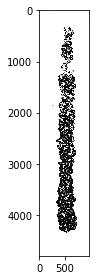

In [11]:
im = skimage.io.imread(paths[5])[:,:,0]
skimage.io.imshow(im[:,20:1000])

In [31]:
#this function to process each and do quantification

def process_set(paths, target_channel, cutoff):

    files = [os.path.basename(s) for s in paths]
    times = [get_time_stamp(f) for f in files]
    plate = [s.split("_")[1] for s in files]
    well = [s.split("_")[2] for s in files]
    condition = [s.split("_")[3] for s in files]
    scRNA_include = ['scRNA' in s for s in files]

    cols = {'dots':'green', 'hand':'red', 'line':'blue'}
    condition_idx = [cols[s] for s in condition]

    pal = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

    cols_long = {'plate1a':pal[0],
           'plate1b':pal[0],
           'plate2a':pal[1],
           "plate2b":pal[1],
           "plate3a":pal[2],
           "plate3b":pal[2],
           "plate4a":pal[3],
           "plate4b":pal[3],
           "plate5":pal[4],
           "plate6":pal[4]}

    plate_idx = [cols_long[p] for p in plate]

    pixel_pred = []
    for f in paths:
        pixel_pred.append(skimage.io.imread(f)[:,:,target_channel]) 
    
    skimage.io.imshow(pixel_pred[5])
    
    #create lists to store measurement data
    areas = []
    solidity = []
    lengths = []
    convex_areas = []
    heights = []
    
    #loop through probability images and extraxt region data
    for img in pixel_pred:
        #print(b)
        #fname.append(b)
        bin_img = skimage.img_as_int(img > cutoff)
        a, s, l, c, h = get_measurements(bin_img)
        areas.append(a)
        solidity.append(s)
        lengths.append(l)
        convex_areas.append(c)
        heights.append(h)

    line_styles = {1:0, 2:10, 3:20, 4:30, 5:40}

    line_idx = [line_styles[h] for h in heights]

    #correct for pixel size
    lengths_c = [(l * pixel_size) / 1000 for l in lengths]
    convex_areas_c = [(c * pixel_size * pixel_size) / 1000000 for c in convex_areas]
    areas_c = [(a * pixel_size * pixel_size) / 1000000 for a in areas]
    
    out_data = pd.DataFrame({'fname':files,
                         'time_stamp':times,
                         'plate':plate,
                         'well':well,
                         'condition':condition,
                         'scRNA_include':scRNA_include,
                         'areas_pix':areas, 
                         'areas_micron':areas_c, 
                         'solidity':solidity, 
                         'lengths_pix':lengths, 
                         'lengths_micron':lengths_c, 
                         'heights':heights,
                         'convex_area_pix':convex_areas, 
                         'convex_area_micron':convex_areas_c,
                         'line_ratio':line_idx})
    
    return(out_data)

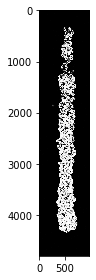

In [32]:
#note typo in the original path

bfp_paths = glob.glob(os.path.join("data", "full_set_trimmed","probabilites", "*Probabilities*"))


df = process_set(bfp_paths, 1, 0.8)

In [33]:
print(np.mean(df[df.condition == 'line'].areas_micron))

print(np.mean(df[df.condition == 'dots'].areas_micron))

3.7868890162037028
0.6310915383254717


2.3006432453804346


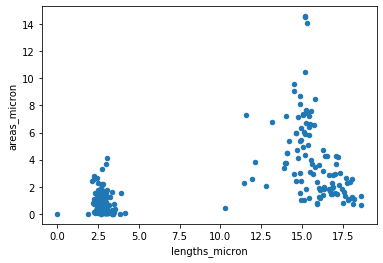

In [25]:
df.plot.scatter(x = 'lengths_micron', y = 'areas_micron')


In [8]:
df.to_csv("KE012_mafb_measurements.csv")

C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\kynan.lawlor\AppData\Local\Continuum\miniconda3\envs\imaging\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See https://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


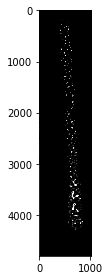

In [5]:
cherry_paths = glob.glob(os.path.join("final_KE012_data", "cherry_full_set_trimmed","probabilities", "*Probabilities*"))

cherry_df = process_set(cherry_paths, 0, 0.5)

In [72]:
cherry_df

,fname,time_stamp,plate,well,condition,scRNA_include,areas_pix,areas_micron,solidity,lengths_pix,lengths_micron,heights,convex_area_pix,convex_area_micron,line_ratio
0,cherry_plate1a_w3_dots_2020-02-11_08.41.56_iso...,08.41.56,plate1a,w3,dots,False,3,0.000032,0.200000,22.068830,0.071724,1,15,0.000158,0
1,cherry_plate3b_w3_dots_2020-02-11_10.13.29_iso...,10.13.29,plate3b,w3,dots,True,2874,0.030357,0.014125,739.577281,2.403626,1,203467,2.149120,0
2,cherry_plate3a_w2_line_2020-02-11_17.43.36_iso...,17.43.36,plate3a,w2,line,False,6254,0.066058,0.009440,3744.205715,12.168669,5,662525,6.997920,40
3,cherry_plate4a_w6_dots_2020-02-11_18.45.56_iso...,18.45.56,plate4a,w6,dots,False,5180,0.054714,0.022880,581.753034,1.890697,1,226398,2.391329,0
4,cherry_plate4b_w5_line_2020-02-11_19.00.01_iso...,19.00.01,plate4b,w5,line,False,11883,0.125514,0.005692,5052.819936,16.421665,5,2087595,22.050222,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,cherry_plate2b_w2_line_2020-02-11_17.27.41_iso...,17.27.41,plate2b,w2,line,False,11645,0.123000,0.005347,5034.795096,16.363084,5,2177856,23.003604,40
196,cherry_plate3a_w3_line_2020-02-11_17.46.09_iso...,17.46.09,plate3a,w3,line,False,1349,0.014249,0.001305,6481.818623,21.065911,5,1033521,10.916566,40
197,cherry_plate2b_w4_dots_2020-02-11_09.48.01_iso...,09.48.01,plate2b,w4,dots,True,27653,0.292085,0.182756,468.770706,1.523505,1,151311,1.598222,0
198,cherry_plate1b_w2_line_2020-02-11_09.06.27_iso...,09.06.27,plate1b,w2,line,True,4889,0.051640,0.003109,4764.110051,15.483358,5,1572509,16.609626,40


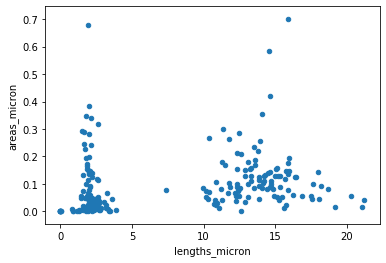

In [10]:
cherry_df.plot.scatter(x = 'lengths_micron', y = 'areas_micron')

In [11]:
cherry_df.to_csv("KE012_cherry_measurements.csv")


,fname,time_stamp,plate,well,condition,scRNA_include,areas_pix,areas_micron,solidity,lengths_pix,lengths_micron,heights,convex_area_pix,convex_area_micron,line_ratio
0,bfp_plate5_hand1_hand_2020-02-11_10.32.12_iso_...,10.32.12,plate5,hand1,hand,False,66640,0.703885,0.152489,1062.507340,3.453149,1,437014,4.615960,0
1,bfp_plate1b_w4_line_2020-02-11_09.12.48_iso_Ky...,09.12.48,plate1b,w4,line,False,272539,2.878693,0.080491,5205.771683,16.918758,5,3385963,35.764234,40
2,bfp_plate4a_w3_dots_2020-02-11_18.31.25_iso_Ky...,18.31.25,plate4a,w3,dots,False,99234,1.048159,0.314818,794.556486,2.582309,1,315211,3.329416,0
3,bfp_plate4b_w5_dots_2020-02-11_18.55.34_iso_Ky...,18.55.34,plate4b,w5,dots,False,54435,0.574970,0.186621,805.645062,2.618346,1,291687,3.080944,0
4,bfp_plate4a_w2_line_2020-02-11_18.28.42_iso_Ky...,18.28.42,plate4a,w2,line,False,683859,7.223261,0.256393,4309.132280,14.004680,5,2667225,28.172564,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,bfp_plate1b_w4_dots_2020-02-11_09.11.47_iso_Ky...,09.11.47,plate1b,w4,dots,False,50001,0.528136,0.168243,826.836407,2.687218,1,297196,3.139133,0
196,bfp_plate3a_w3_line_2020-02-11_17.46.09_iso_Ky...,17.46.09,plate3a,w3,line,False,192871,2.037200,0.127143,3937.755830,12.797706,5,1516957,16.022858,40
197,bfp_plate4b_w4_dots_2020-02-11_18.51.19_iso_Ky...,18.51.19,plate4b,w4,dots,False,240994,2.545499,0.706941,687.222383,2.233473,1,340897,3.600725,0
198,bfp_plate1b_w3_dots_2020-02-11_09.08.16_iso_Ky...,09.08.16,plate1b,w3,dots,False,9334,0.098590,0.031770,931.269393,3.026626,1,293795,3.103210,0


In [79]:
out_data.to_csv('KE012_full_set_measurements.csv')